<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---
 

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt


from skimage import io, segmentation, color
from skimage import graph

%matplotlib inline

In [11]:
image = io.imread("../estelle.png")
rows, cols, depth = image.shape
print(rows)
print(cols)
print(depth)

726
732
4


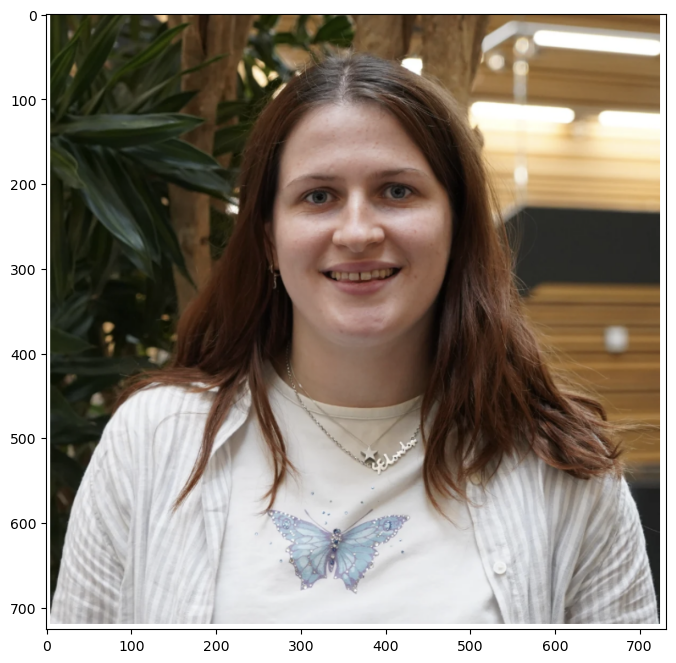

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(image)

In [17]:
image

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

## Partion the image into superpixels

In [15]:
segments_slic = segmentation.slic(image, n_segments=1200, compactness=30, sigma=.5)
print(np.amax(segments_slic))

1225


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (94502,4)

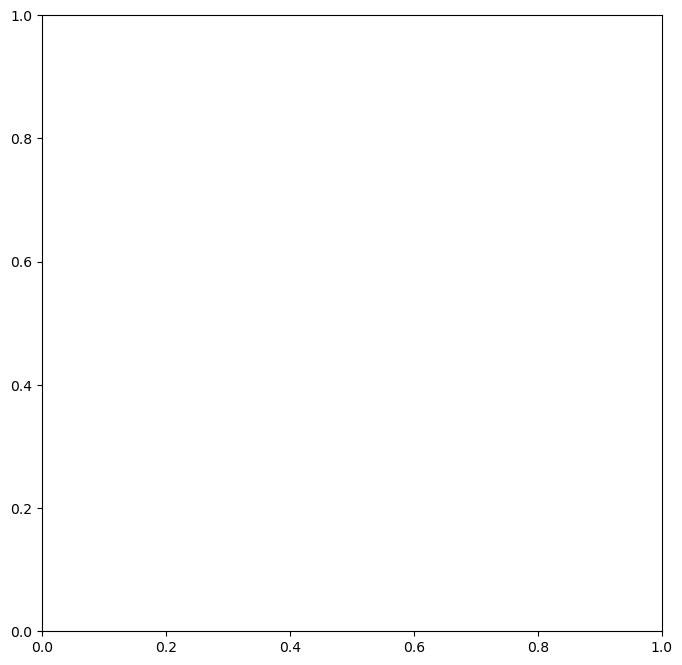

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(segmentation.mark_boundaries(image, segments_slic))
plt.show()

## Now compute the normalised cut on the superpixels

In [8]:
g = graph.rag_mean_color(image, segments_slic, mode='similarity')
labels = graph.cut_normalized(segments_slic, g)
output = color.label2rgb(labels, image, kind='avg')

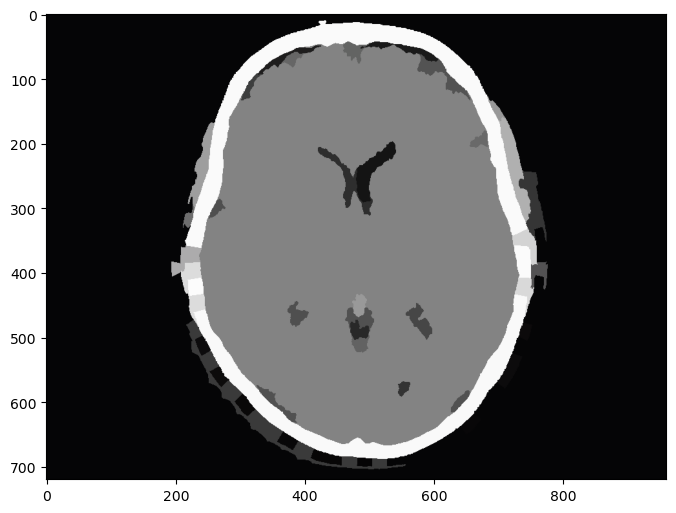

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(output)
plt.show()